<a href="https://colab.research.google.com/github/SowjanyaSadashivu/Projects/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os
import re
import random
import numpy as np
import pandas as pd
from wordcloud import *
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
upload_file = files.upload()
data_file = pd.read_csv(io.BytesIO(upload_file['yelp_review.csv']))

Saving yelp_review.csv to yelp_review (5).csv


In [ ]:
data_file

,Reviews,Sentiment
0,Wow Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
983,I think food should have flavor and texture an...,0
984,Appetite instantly gone.,0
985,Overall I was not impressed and would not go b...,0
986,The whole experience was underwhelming and I ...,0


In [ ]:
print(data_file['Sentiment'].value_counts())
print(data_file.shape)

0    499
1    489
Name: Sentiment, dtype: int64
(988, 2)


In [ ]:
def remove_numbers_from_reviews(text):
  text_remove_numbers = ''.join([i for i in text if not i.isdigit()])
  return text_remove_numbers

def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z\s]'
  text=re.sub(pattern,'',text)
  return text

def convert_to_lower(text):
  text = text.lower()
  return text


In [ ]:
review_all_data = data_file['Reviews'].apply(convert_to_lower)
review_all_data = review_all_data.apply(remove_numbers_from_reviews)
review_all_data = review_all_data.apply(remove_special_characters)

In [ ]:
data_file['Reviews'] = review_all_data
data_file

,Reviews,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
983,i think food should have flavor and texture an...,0
984,appetite instantly gone,0
985,overall i was not impressed and would not go b...,0
986,the whole experience was underwhelming and i ...,0


In [ ]:
train_dataset = data_file[: 632]
validation_dataset = data_file[632:790]
test_dataset = data_file[790:]

In [ ]:
test_dataset['Reviews']

790                    and service was super friendly   
791    why are these sad little vegetables so overcoo...
792               this place was such a nice surprise   
793              they were goldencrispy and delicious   
794    i had high hopes for this place since the burg...
                             ...                        
983    i think food should have flavor and texture an...
984                           appetite instantly gone   
985    overall i was not impressed and would not go b...
986    the whole experience was underwhelming  and i ...
987    then  as if i hadnt wasted enough of my life t...
Name: Reviews, Length: 198, dtype: object

In [ ]:
#review_train_dataset = train_dataset['Reviews'].apply(convert_to_lower)
#review_test_dataset = test_dataset['Reviews'].apply(convert_to_lower)
#review_validation_dataset = validation_dataset['Reviews'].apply(convert_to_lower)

In [ ]:
#review_train_dataset = review_train_dataset.apply(remove_numbers_from_reviews)
#review_validation_dataset = review_validation_dataset.apply(remove_numbers_from_reviews)
#review_test_dataset = review_test_dataset.apply(remove_numbers_from_reviews)
#review_train_dataset = review_train_dataset.apply(remove_special_characters)
#review_test_dataset = review_test_dataset.apply(remove_special_characters)
#review_validation_dataset = review_validation_dataset.apply(remove_special_characters)
#review_train_dataset

In [ ]:
word_list_all = []
number_of_words = 0
for words in train_dataset['Reviews']:
  words = words.split()

  for list_of_words in words:
    word_list_all.append(list_of_words)
    number_of_words = number_of_words + 1

word_list_all.sort()

word_Dictionary = {}
min_count = 5
key = 0
dictionary = dict([])
for word in word_list_all:
  number_count = word_list_all.count(word)
  if number_count > min_count:
    word_Dictionary[word] = word_list_all.count(word)
    dictionary[word] = word_list_all.count(word)

print("Dictionary of words :", dictionary)    
     
print('\n{:^8}{:^8}'.format('Words','Count'))  

for words in word_Dictionary:
  print('\n{:^8}{:^8d}'.format(words, word_Dictionary[words]))


print("\nNumber of all Words = ", number_of_words)
 


Dictionary of words : {'a': 145, 'about': 8, 'after': 6, 'again': 17, 'all': 24, 'also': 19, 'always': 11, 'amazing': 14, 'an': 26, 'and': 261, 'another': 9, 'any': 9, 'are': 39, 'as': 21, 'at': 29, 'atmosphere': 6, 'back': 41, 'bad': 10, 'be': 40, 'because': 11, 'been': 13, 'before': 7, 'being': 11, 'best': 22, 'better': 10, 'bland': 7, 'breakfast': 7, 'buffet': 6, 'burger': 10, 'but': 37, 'by': 17, 'came': 10, 'can': 11, 'cant': 8, 'chicken': 12, 'clean': 6, 'come': 11, 'cooked': 6, 'could': 12, 'deal': 6, 'definitely': 13, 'delicious': 22, 'did': 12, 'didnt': 8, 'dining': 6, 'disappointed': 13, 'dish': 6, 'do': 7, 'dont': 18, 'down': 6, 'eat': 9, 'eating': 7, 'enough': 9, 'even': 10, 'ever': 19, 'every': 6, 'everything': 7, 'excellent': 7, 'experience': 9, 'fantastic': 9, 'first': 15, 'flavor': 8, 'food': 80, 'for': 72, 'fresh': 10, 'friendly': 19, 'from': 12, 'get': 7, 'give': 8, 'go': 28, 'going': 11, 'good': 66, 'got': 13, 'great': 47, 'had': 45, 'happy': 6, 'has': 8, 'have': 37,

In [ ]:
print("List of Key: ",list(dictionary.keys()))

List of Key:  ['a', 'about', 'after', 'again', 'all', 'also', 'always', 'amazing', 'an', 'and', 'another', 'any', 'are', 'as', 'at', 'atmosphere', 'back', 'bad', 'be', 'because', 'been', 'before', 'being', 'best', 'better', 'bland', 'breakfast', 'buffet', 'burger', 'but', 'by', 'came', 'can', 'cant', 'chicken', 'clean', 'come', 'cooked', 'could', 'deal', 'definitely', 'delicious', 'did', 'didnt', 'dining', 'disappointed', 'dish', 'do', 'dont', 'down', 'eat', 'eating', 'enough', 'even', 'ever', 'every', 'everything', 'excellent', 'experience', 'fantastic', 'first', 'flavor', 'food', 'for', 'fresh', 'friendly', 'from', 'get', 'give', 'go', 'going', 'good', 'got', 'great', 'had', 'happy', 'has', 'have', 'he', 'here', 'how', 'i', 'if', 'ill', 'im', 'in', 'is', 'it', 'its', 'ive', 'just', 'know', 'left', 'like', 'little', 'love', 'loved', 'made', 'make', 'many', 'me', 'menu', 'minutes', 'more', 'much', 'my', 'never', 'next', 'nice', 'night', 'no', 'not', 'nothing', 'now', 'of', 'off', 'on',

In [ ]:
print("List of Values: ", list(dictionary.values()))

List of Values:  [145, 8, 6, 17, 24, 19, 11, 14, 26, 261, 9, 9, 39, 21, 29, 6, 41, 10, 40, 11, 13, 7, 11, 22, 10, 7, 7, 6, 10, 37, 17, 10, 11, 8, 12, 6, 11, 6, 12, 6, 13, 22, 12, 8, 6, 13, 6, 7, 18, 6, 9, 7, 9, 10, 19, 6, 7, 7, 9, 9, 15, 8, 80, 72, 10, 19, 12, 7, 8, 28, 11, 66, 13, 47, 45, 6, 8, 37, 15, 32, 8, 185, 18, 6, 11, 70, 114, 76, 10, 13, 23, 8, 6, 30, 6, 10, 9, 12, 6, 7, 9, 9, 16, 10, 11, 46, 21, 7, 14, 8, 13, 70, 6, 7, 82, 7, 39, 18, 19, 7, 7, 9, 13, 26, 14, 6, 6, 9, 65, 11, 6, 11, 22, 7, 17, 7, 10, 6, 7, 8, 49, 6, 42, 12, 6, 12, 9, 10, 8, 6, 8, 7, 11, 8, 6, 9, 45, 371, 16, 11, 24, 36, 11, 102, 30, 11, 136, 9, 6, 6, 7, 16, 12, 18, 49, 7, 10, 6, 7, 9, 188, 7, 7, 49, 12, 9, 40, 11, 14, 11, 29, 40, 6, 8, 9, 8, 15, 40, 14]


In [ ]:
number_of_the = dictionary.get("the")
print(number_of_the)

371


In [ ]:
prob_of_the = number_of_the/number_of_words
print("Probability of the is :", prob_of_the)

Probability of the is : 0.05422391113709442


In [ ]:
train_dataset['Reviews']

0                                   wow loved this place
1                                   crust is not good   
2            not tasty and the texture was just nasty   
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
627    after waiting an hour and being seated  i was ...
628                              this is a good joint   
629               the macarons here are insanely good   
630                                im not eating here   
631    our waiter was very attentive  friendly  and i...
Name: Reviews, Length: 632, dtype: object

In [ ]:
df = pd.DataFrame(train_dataset)
df

,Reviews,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
627,after waiting an hour and being seated i was ...,1
628,this is a good joint,0
629,the macarons here are insanely good,0
630,im not eating here,0


In [ ]:
train_positive = train_dataset.loc[train_dataset['Sentiment']!= 0]
train_positive

,Reviews,Sentiment
0,wow loved this place,1
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
8,the fries were great too,1
9,a great touch,1
...,...,...
622,highquality chicken on the chicken caesar sala...,1
623,ordered burger rare came in well done,1
625,tried to go here for lunch and it was a madhou...,1
627,after waiting an hour and being seated i was ...,1


In [ ]:
train_positive_review = train_positive['Reviews']
train_positive_review

0                                   wow loved this place
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
8                            the fries were great too   
9                                       a great touch   
                             ...                        
622    highquality chicken on the chicken caesar sala...
623             ordered burger rare came in well done   
625    tried to go here for lunch and it was a madhou...
627    after waiting an hour and being seated  i was ...
631    our waiter was very attentive  friendly  and i...
Name: Reviews, Length: 348, dtype: object

In [ ]:
train_positive_review = train_positive_review.apply(convert_to_lower)
train_positive_review = train_positive_review.apply(remove_numbers_from_reviews)
train_positive_review = train_positive_review.apply(remove_special_characters)

In [ ]:
word_list_pos_review = []
number_of_words_in_pos_review = 0
for words in train_positive_review:
  words = words.split()

  for list_of_words in words:
    word_list_pos_review.append(list_of_words)
    number_of_words_in_pos_review = number_of_words_in_pos_review + 1

word_list_pos_review.sort()

word_Dictionary = {}
min_count = 5
key = 0
dictionary_positive = dict([])
for word in word_list_pos_review:
  number_count = word_list_pos_review.count(word)
  if number_count > min_count:
    word_Dictionary[word] = word_list_pos_review.count(word)
    dictionary_positive[word] = word_list_pos_review.count(word)

print("Dictionary of words in positive train reviews:", dictionary_positive)    
     
print('\n{:^8}{:^8}'.format('Words','Count'))  

for words in word_Dictionary:
  print('\n{:^8}{:^8d}'.format(words, word_Dictionary[words]))


print("\nNumber of all Words in positive train reviews = ", number_of_words_in_pos_review)   
    
  

Dictionary of words in positive train reviews: {'a': 83, 'again': 12, 'all': 17, 'also': 9, 'always': 8, 'amazing': 9, 'an': 14, 'and': 145, 'any': 6, 'are': 19, 'as': 12, 'at': 16, 'back': 24, 'bad': 8, 'be': 23, 'been': 9, 'best': 12, 'better': 9, 'breakfast': 7, 'burger': 7, 'but': 24, 'by': 9, 'came': 7, 'can': 7, 'could': 8, 'definitely': 6, 'delicious': 17, 'disappointed': 7, 'dont': 13, 'enough': 6, 'even': 7, 'ever': 10, 'everything': 6, 'experience': 8, 'first': 8, 'food': 56, 'for': 41, 'fresh': 6, 'friendly': 7, 'from': 6, 'get': 7, 'go': 18, 'going': 6, 'good': 44, 'got': 10, 'great': 21, 'had': 24, 'have': 25, 'he': 9, 'here': 15, 'how': 6, 'i': 93, 'if': 15, 'in': 38, 'is': 66, 'it': 48, 'its': 7, 'ive': 12, 'just': 13, 'like': 15, 'love': 7, 'loved': 6, 'made': 7, 'menu': 6, 'minutes': 8, 'more': 7, 'my': 21, 'never': 13, 'nice': 6, 'no': 7, 'not': 34, 'of': 49, 'on': 26, 'one': 14, 'only': 11, 'ordered': 6, 'other': 7, 'our': 14, 'out': 8, 'people': 6, 'place': 33, 'pre

In [ ]:
number_of_the_in_positive_review = dictionary_positive.get("the")
print(number_of_the_in_positive_review)

206


In [ ]:
probability_of_the_given_positive = number_of_the_in_positive_review/number_of_words_in_pos_review
print("Probability of THE given POSITIVE :", probability_of_the_given_positive)

Probability of THE given POSITIVE : 0.05282051282051282


In [ ]:
dictionary.get("the")

371

In [ ]:
dictionary_positive.get("the")

206

In [ ]:
number_of_words

6842

In [ ]:
number_of_words_in_pos_review

3900

In [ ]:
def probability(value):  
  try:
      prob_of_given_data = dictionary.get(value)/number_of_words
  except:
    print("Enter string only in quotes") 
  else:
    return prob_of_given_data

def cond_probabilty_positive(value):
  try:
    cond_prob_of_data = dictionary_positive.get(value)/number_of_words_in_pos_review
  except:
    print("Enter string only in the quotes")  
  else:
    return cond_prob_of_data  

In [ ]:
prob_value = probability("the")
print("The probability of the: ",prob_value)
cond_prob_value = cond_probabilty_positive("the")
print("Conditional probability of THE given positive :",cond_prob_value)

The probability of the:  0.05422391113709442
Conditional probability of THE given positive : 0.05282051282051282


In [ ]:
print("probability of words :")
print("------------------------")
for key in dictionary:
  prob_value_for_all_words = probability(key)
  print(key, '->', prob_value_for_all_words)


probability of words :
------------------------
a -> 0.02119263373282666
about -> 0.001169248757673195
after -> 0.0008769365682548962
again -> 0.0024846536100555394
all -> 0.0035077462730195848
also -> 0.002776965799473838
always -> 0.001607717041800643
amazing -> 0.0020461853259280912
an -> 0.003800058462437884
and -> 0.03814674071908799
another -> 0.0013154048523823444
any -> 0.0013154048523823444
are -> 0.005700087693656825
as -> 0.0030692779888921366
at -> 0.0042385267465653315
atmosphere -> 0.0008769365682548962
back -> 0.005992399883075124
bad -> 0.0014615609470914938
be -> 0.005846243788365975
because -> 0.001607717041800643
been -> 0.001900029231218942
before -> 0.0010230926629640456
being -> 0.001607717041800643
best -> 0.003215434083601286
better -> 0.0014615609470914938
bland -> 0.0010230926629640456
breakfast -> 0.0010230926629640456
buffet -> 0.0008769365682548962
burger -> 0.0014615609470914938
but -> 0.005407775504238527
by -> 0.0024846536100555394
came -> 0.001461560947

In [ ]:
print("Probability of words given positive :")
print("---------------------------------------")
for key in dictionary_positive:
  con_prob_of_pos_values = cond_probabilty(key)  
  print(key, '->', con_prob_of_pos_values) 
 

Probability of words given positive :
---------------------------------------
a -> 0.02128205128205128
again -> 0.003076923076923077
all -> 0.004358974358974359
also -> 0.002307692307692308
always -> 0.0020512820512820513
amazing -> 0.002307692307692308
an -> 0.0035897435897435897
and -> 0.03717948717948718
any -> 0.0015384615384615385
are -> 0.004871794871794872
as -> 0.003076923076923077
at -> 0.0041025641025641026
back -> 0.006153846153846154
bad -> 0.0020512820512820513
be -> 0.005897435897435898
been -> 0.002307692307692308
best -> 0.003076923076923077
better -> 0.002307692307692308
breakfast -> 0.0017948717948717949
burger -> 0.0017948717948717949
but -> 0.006153846153846154
by -> 0.002307692307692308
came -> 0.0017948717948717949
can -> 0.0017948717948717949
could -> 0.0020512820512820513
definitely -> 0.0015384615384615385
delicious -> 0.004358974358974359
disappointed -> 0.0017948717948717949
dont -> 0.0033333333333333335
enough -> 0.0015384615384615385
even -> 0.0017948717948

In [ ]:
dfall = pd.DataFrame(data_file)
dfall

,Reviews,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
983,i think food should have flavor and texture an...,0
984,appetite instantly gone,0
985,overall i was not impressed and would not go b...,0
986,the whole experience was underwhelming and i ...,0


In [ ]:
positive_reviews = data_file.loc[data_file['Sentiment']!= 0]
positive_reviews

,Reviews,Sentiment
0,wow loved this place,1
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
8,the fries were great too,1
9,a great touch,1
...,...,...
891,the buffet at bellagio was far from what i ant...,1
893,also i feel like the chips are bought not ma...,1
899,very very sad,1
901,how can you call yourself a steakhouse if you ...,1


In [ ]:
negative_reviews = data_file.loc[data_file['Sentiment'] == 0]
negative_reviews

,Reviews,Sentiment
1,crust is not good,0
2,not tasty and the texture was just nasty,0
5,now i am getting angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes were like rubber and you could te...,0
...,...,...
983,i think food should have flavor and texture an...,0
984,appetite instantly gone,0
985,overall i was not impressed and would not go b...,0
986,the whole experience was underwhelming and i ...,0


In [ ]:
positive_words = []
number_of_words_positive = 0
for words in positive_reviews['Reviews']:
  words = words.split()

  for list_of_words in words:
    positive_words.append(list_of_words)
    number_of_words_positive = number_of_words_positive + 1

positive_words.sort()
print("positive words : ", positive_words)

min_count = 5
dictionary_pos = dict([])
for word in positive_words:
  number_count = positive_words.count(word)
  if number_count > min_count:
    dictionary_pos[word] = positive_words.count(word)

print("Dictionary of positive words", dictionary_pos)    
     
print('\n{:^8}{:^8}'.format('Words','Count'))  

for words in dictionary_pos:
  print('\n{:^8}{:^8d}'.format(words, dictionary_pos[words]))

unique_words = set()
for x in positive_words:
  unique_words.add(x)


unique_words = list(unique_words)
unique_words.sort()
unique_positive_words = unique_words
print("Unique positive words: ",unique_positive_words)
print("Number of positive words :", number_of_words_positive)
 


positive words :  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'absolutely', 'absolutely', 'absolutely', 'absolutely', 'absolutely', 'absolutely', 'absolutely', 'absolutley', 'accommodations', 'accomodate', 'accountant', 'ache', 'acknowledged', 'across', 'actually', 'actually', 'added', 'after', 'after', 'after', 'after', 'after', 'after', 'after', 'afternoon', 'again', 'again', 'again', 'again', 'a

In [ ]:
negative_words = []
number_of_negative_words = 0
for words in negative_reviews['Reviews']:
  words = words.split()

  for list_of_words in words:
    negative_words.append(list_of_words)
    number_of_negative_words = number_of_negative_words + 1

negative_words.sort()    
print("Negative words :", negative_words)

min_count = 5
dictionary_neg = dict([])
for word in negative_words:
  number_count = negative_words.count(word)
  if number_count > min_count:
    dictionary_neg[word] = negative_words.count(word)

print("Dictionary of negative words", dictionary_neg)    
     
print('\n{:^8}{:^8}'.format('Words','Count'))  

for words in dictionary_neg:
  print('\n{:^8}{:^8d}'.format(words, dictionary_neg[words]))


unique_words_neg = set()
for x in negative_words:
  unique_words_neg.add(x)

unique_words_neg = list(unique_words_neg)  
unique_words_neg.sort()
unique_negative_words = unique_words_neg
print("Unique negative words :", unique_negative_words)
print("Number of negative words:", number_of_negative_words)                             


Negative words : ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'absolute', 'absolutely', 'accident', 'acknowledged', 'actual', 'added', 'affordable', 'after', 'after', 'after', 'after', 'after', 'again', 'again', 'again', 'again', 'again', 'again', 'again', 'again', 'again', 'ahead', 'ala', 'albondigas', 'all', 'all', 'all', 'all', 'a

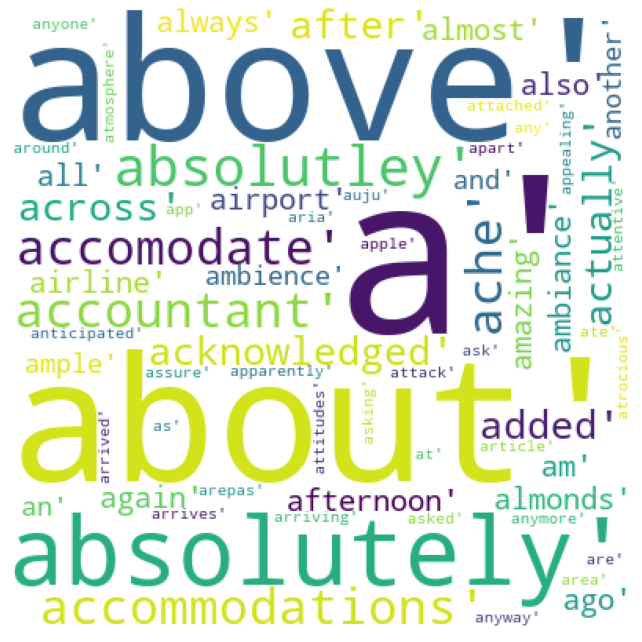

In [ ]:
text = str(unique_positive_words)

wordcloud = WordCloud(width=400, height=400,
                      background_color = 'white',
                      min_font_size = 10).generate(text)

plt.figure(figsize= (9,9))                      
plt.imshow(wordcloud)
plt.tight_layout(pad= 0)
plt.axis("off")
plt.show()


In [ ]:
# over all data
number_of_negative_words
number_of_words_positive

5379

In [ ]:
tf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_train = tf_vect.fit_transform(review_train_dataset)
tf_test = tf_vect.transform(review_test_dataset)

alpha_range = list(np.arange(60,80,1))


In [ ]:
alpha_score = []
for a in alpha_range:
  clf = MultinomialNB(alpha = a)
  scores = cross_val_score(clf, tf_train, train_dataset['Sentiment'], cv=5, scoring='accuracy')
  alpha_score.append(scores.mean())
  print(a, scores.mean())

60 0.550631171103612
61 0.550631171103612
62 0.550631171103612
63 0.550631171103612
64 0.550631171103612
65 0.550631171103612
66 0.550631171103612
67 0.550631171103612
68 0.550631171103612
69 0.550631171103612
70 0.550631171103612
71 0.550631171103612
72 0.550631171103612
73 0.550631171103612
74 0.550631171103612
75 0.550631171103612
76 0.550631171103612
77 0.550631171103612
78 0.550631171103612
79 0.550631171103612


In [ ]:
pos_word = random.sample(unique_positive_words, 20)
neg_word = random.sample(unique_negative_words, 20)
freq_neg_word = {x:neg_word.count(x) for x in neg_word}
freq_pos_word = {x:pos_word.count(x) for x in pos_word}


In [ ]:
lists = []
for key in freq_pos_word:
  prob = freq_pos_word[key]/number_of_words_positive
  lists.append([key, prob])

positive_data_table = pd.DataFrame(lists, columns=['Positive words', 'Probability'])
positive_data_table = positive_data_table.sort_values('Probability', axis = 0, kind = 'quicksort')
positive_data_table.head(10)


,Positive words,Probability
0,ample,0.000186
17,rice,0.000186
16,desired,0.000186
15,seems,0.000186
14,great,0.000186
13,ordering,0.000186
12,sooooo,0.000186
11,without,0.000186
10,nasty,0.000186
9,small,0.000186


In [ ]:
lists = []
for key in freq_neg_word:
  prob = freq_neg_word[key]/number_of_negative_words
  lists.append([key, prob])

negative_data_table = pd.DataFrame(lists, columns=['Negative words', 'Probability'])
negative_data_table = negative_data_table.sort_values('Probability', axis = 0, kind = 'quicksort')
negative_data_table.head(10)

,Negative words,Probability
0,loving,0.000186
17,sandwich,0.000186
16,club,0.000186
15,summer,0.000186
14,foods,0.000186
13,this,0.000186
12,options,0.000186
11,itll,0.000186
10,occasional,0.000186
9,real,0.000186


In [ ]:
clf = MultinomialNB(alpha = 0.009)
clf.fit(tf_train, train_dataset['Sentiment'])

MultinomialNB(alpha=0.009, class_prior=None, fit_prior=True)

In [ ]:
y_pred_test = clf.predict(tf_test)

In [ ]:
from sklearn.metrics import *

accuracy_test = accuracy_score(test_dataset['Sentiment'], y_pred_test, normalize=True) * float(100)
print("Test Accuracy is: ", accuracy_test)

Test Accuracy is:  45.95959595959596


In [ ]:
y_pred_train = clf.predict(tf_train)
accuracy_train = accuracy_score(train_dataset['Sentiment'], y_pred_train, normalize=True) * float(100)
print("Train Accuracy is: ", accuracy_train)

Train Accuracy is:  99.36708860759494
